In [ ]:
import numpy as np
import pandas as pd

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns

In [ ]:
from sklearn.preprocessing import StandardScaler,LabelEncoder
from sklearn.linear_model import LinearRegression,Lasso,Ridge
from sklearn.ensemble import RandomForestRegressor,BaggingRegressor,AdaBoostRegressor,GradientBoostingRegressor
from sklearn.tree import DecisionTreeRegressor
from sklearn.neighbors import KNeighborsRegressor
from xgboost import XGBRegressor

In [ ]:
from sklearn.model_selection import train_test_split

In [ ]:
from sklearn.metrics import mean_squared_error,mean_absolute_error,r2_score

In [ ]:
data=pd.read_csv("/content/insurance.csv")

In [ ]:
data.shape

(1338, 7)

In [ ]:
data.columns

Index(['age', 'sex', 'bmi', 'children', 'smoker', 'region', 'charges'], dtype='object')

In [ ]:
data.head()

,age,sex,bmi,children,smoker,region,charges
0,19,female,27.900,0,yes,southwest,16884.92400
1,18,male,33.770,1,no,southeast,1725.55230
2,28,male,33.000,3,no,southeast,4449.46200
3,33,male,22.705,0,no,northwest,21984.47061
4,32,male,28.880,0,no,northwest,3866.85520


In [ ]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1338 entries, 0 to 1337
Data columns (total 7 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       1338 non-null   int64  
 1   sex       1338 non-null   object 
 2   bmi       1338 non-null   float64
 3   children  1338 non-null   int64  
 4   smoker    1338 non-null   object 
 5   region    1338 non-null   object 
 6   charges   1338 non-null   float64
dtypes: float64(2), int64(2), object(3)
memory usage: 73.3+ KB


In [ ]:
data.dtypes

,0
age,int64
sex,object
bmi,float64
children,int64
smoker,object
region,object
charges,float64


In [ ]:
data.isnull().sum()

,0
age,0
sex,0
bmi,0
children,0
smoker,0
region,0
charges,0


In [ ]:
data.duplicated().sum()

np.int64(1)

In [ ]:
data.describe()

,age,bmi,children,charges
count,1338.000000,1338.000000,1338.000000,1338.000000
mean,39.207025,30.663397,1.094918,13270.422265
std,14.049960,6.098187,1.205493,12110.011237
min,18.000000,15.960000,0.000000,1121.873900
25%,27.000000,26.296250,0.000000,4740.287150
50%,39.000000,30.400000,1.000000,9382.033000
75%,51.000000,34.693750,2.000000,16639.912515
max,64.000000,53.130000,5.000000,63770.428010


In [ ]:
data.corr(numeric_only=True)  # correlation of Numerical Col

,age,bmi,children,charges
age,1.000000,0.109272,0.042469,0.299008
bmi,0.109272,1.000000,0.012759,0.198341
children,0.042469,0.012759,1.000000,0.067998
charges,0.299008,0.198341,0.067998,1.000000


In [ ]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1338 entries, 0 to 1337
Data columns (total 7 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       1338 non-null   int64  
 1   sex       1338 non-null   object 
 2   bmi       1338 non-null   float64
 3   children  1338 non-null   int64  
 4   smoker    1338 non-null   object 
 5   region    1338 non-null   object 
 6   charges   1338 non-null   float64
dtypes: float64(2), int64(2), object(3)
memory usage: 73.3+ KB


In [ ]:
le=LabelEncoder()
for i in ['sex','smoker','region']:
  data[i]= le.fit_transform(data[i])

In [ ]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1338 entries, 0 to 1337
Data columns (total 7 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       1338 non-null   int64  
 1   sex       1338 non-null   int64  
 2   bmi       1338 non-null   float64
 3   children  1338 non-null   int64  
 4   smoker    1338 non-null   int64  
 5   region    1338 non-null   int64  
 6   charges   1338 non-null   float64
dtypes: float64(2), int64(5)
memory usage: 73.3 KB


In [ ]:
X=data.drop(['charges','children','region'],axis=1)
Y=data['charges']

In [ ]:
X

,age,sex,bmi,smoker
0,19,0,27.900,1
1,18,1,33.770,0
2,28,1,33.000,0
3,33,1,22.705,0
4,32,1,28.880,0
...,...,...,...,...
1333,50,1,30.970,0
1334,18,0,31.920,0
1335,18,0,36.850,0
1336,21,0,25.800,0


In [ ]:
Y

,charges
0,16884.92400
1,1725.55230
2,4449.46200
3,21984.47061
4,3866.85520
...,...
1333,10600.54830
1334,2205.98080
1335,1629.83350
1336,2007.94500


In [ ]:
X_train,X_test,y_train,y_test=train_test_split(X,Y,test_size=0.2,random_state=2)

In [ ]:
print(X_train.shape)
print(X_test.shape)
print(y_train.shape)
print(y_test.shape)

(1070, 4)
(268, 4)
(1070,)
(268,)


**Normalization (Standard Scaler)**

In [ ]:
scaler=StandardScaler()
scaler.fit(X_train,X_test)
X_train_scaled=scaler.transform(X_train)
X_test_scaled=scaler.transform(X_test)

In [ ]:
X_train_scaled

array([[-1.33631918, -1.01886959, -1.41805377, -0.50729114],
       [-0.18052529,  0.98147988,  0.03017623, -0.50729114],
       [ 1.33645421, -1.01886959,  0.39886179, -0.50729114],
       ...,
       [ 1.55316556,  0.98147988,  2.10558593, -0.50729114],
       [ 0.83079438, -1.01886959, -0.81075823, -0.50729114],
       [ 1.33645421, -1.01886959,  0.28204232, -0.50729114]])

**Regression Models**

In [ ]:
regression_models={
    'Linear Regression':LinearRegression(),
    'Random Forest':RandomForestRegressor(),
    'Lasso Regression':Lasso(),
    'Ridge':Ridge(),
    'Adaboost Regerssor': AdaBoostRegressor(),
    'Bagging Regressor': BaggingRegressor(),
    'Gradient Boosting Regressor': GradientBoostingRegressor(),
    'KNeighbors Regressor': KNeighborsRegressor(),
    'XGBoost Regressor': XGBRegressor()
}


 Performance of - Linear Regression
R2 Score: 74.58396938166175
MAE: 4236.035011306864
MSE: 38169988.39664252


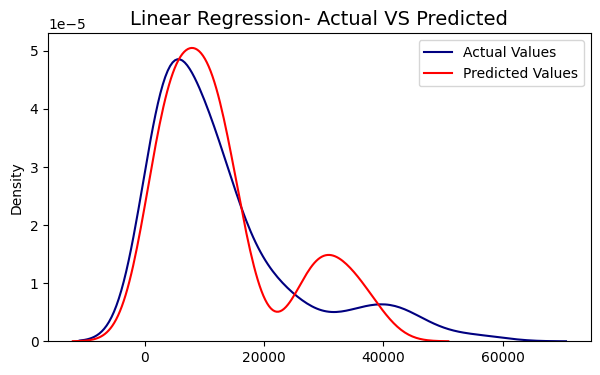


 Performance of - Random Forest
R2 Score: 80.38692738102667
MAE: 3090.6592794816893
MSE: 29455061.86747214


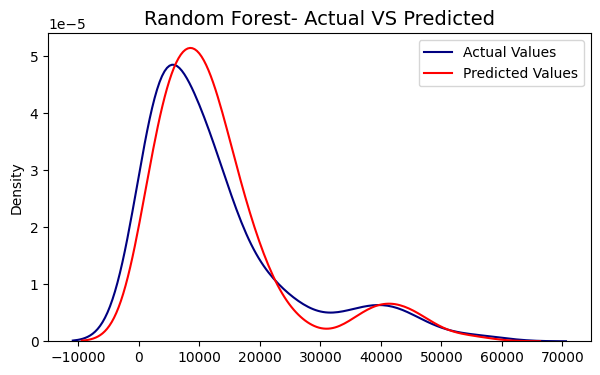


 Performance of - Lasso Regression
R2 Score: 74.58308781913863
MAE: 4235.780310183181
MSE: 38171312.33395531


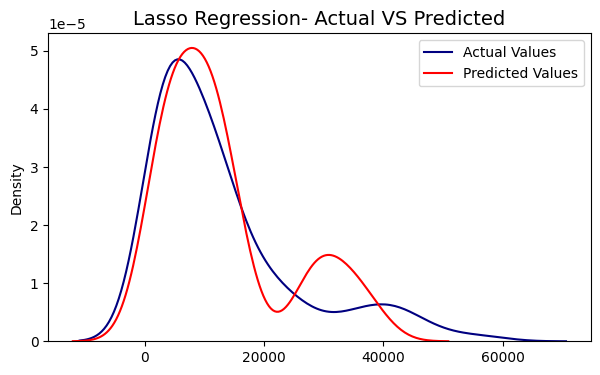


 Performance of - Ridge
R2 Score: 74.58365678238914
MAE: 4236.6263504038025
MSE: 38170457.86061143


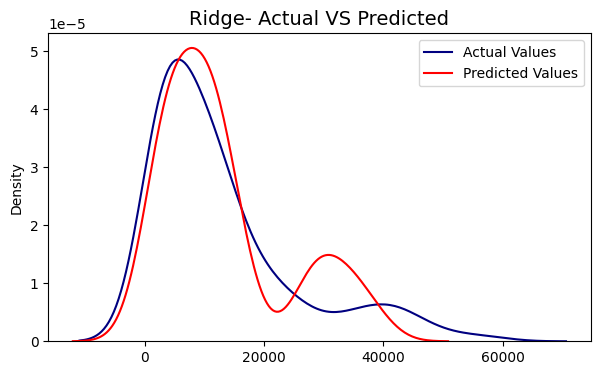


 Performance of - Adaboost Regerssor
R2 Score: 81.41158875228027
MAE: 4300.06255443236
MSE: 27916217.614466786


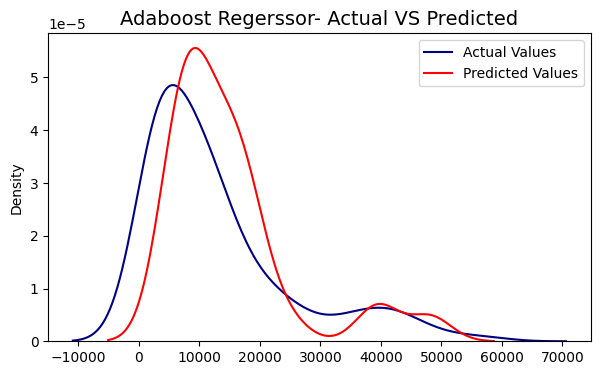


 Performance of - Bagging Regressor
R2 Score: 80.52855577122664
MAE: 3036.656004298881
MSE: 29242363.272174258


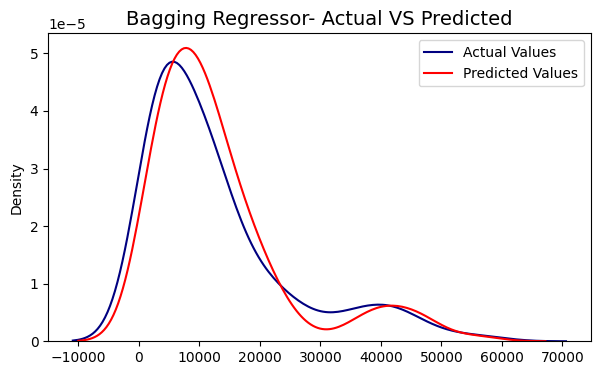


 Performance of - Gradient Boosting Regressor
R2 Score: 86.30387482545059
MAE: 2479.581025144781
MSE: 20568945.12136431


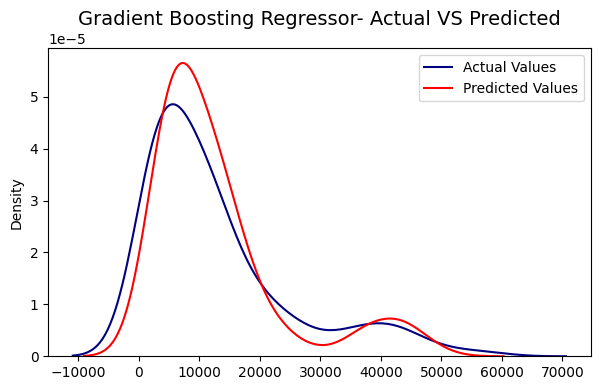


 Performance of - KNeighbors Regressor
R2 Score: 82.92639470724255
MAE: 2946.746164342537
MSE: 25641270.491828505


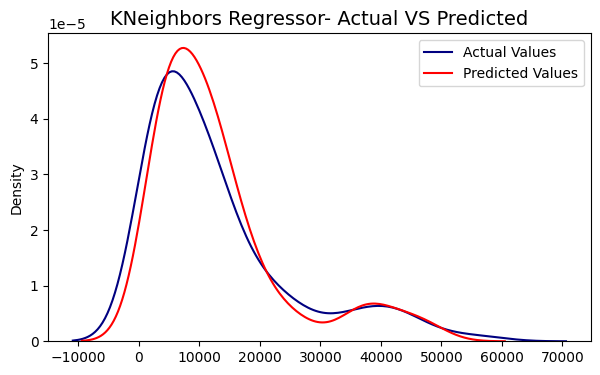


 Performance of - XGBoost Regressor
R2 Score: 78.56388728413852
MAE: 3438.2954610618294
MSE: 32192917.372518104


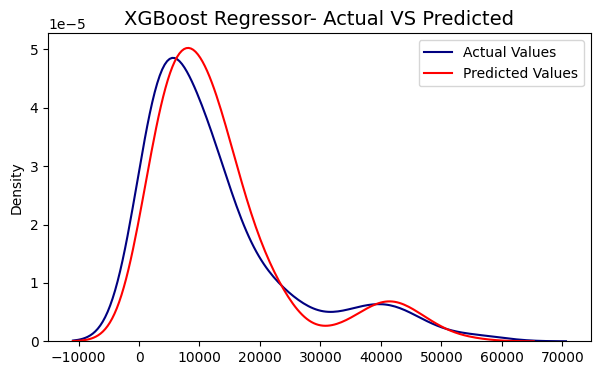

In [ ]:
for model_names, model in regression_models.items():
    model.fit(X_train_scaled, y_train)
    predictions = model.predict(X_test_scaled)
    r2 = r2_score(y_test, predictions)*100
    mae = mean_absolute_error(y_test, predictions)
    mse = mean_squared_error(y_test, predictions)
    print(f'\n Performance of - {model_names}')
    print(f'R2 Score: {r2}')
    print(f'MAE: {mae}')
    print(f'MSE: {mse}')


    plt.figure(figsize=(7, 4))
    sns.kdeplot(y_test.values, color='navy', label='Actual Values')
    sns.kdeplot(predictions, color='red', label='Predicted Values')
    plt.title(f'{model_names}- Actual VS Predicted', fontsize=14)
    plt.legend()
    plt.show()